In [38]:
import os
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np


In [2]:
output_dir = "sw_security_htmls"
os.makedirs(output_dir, exist_ok=True)

def download_wikipedia_urls(file_path, output_directory):
    with open(file_path, "r", encoding="utf-8") as file:
        urls = file.readlines()
        for idx, url in enumerate(urls, start=1):
            url = url.strip()
            response = requests.get(url)
            if response.status_code == 200:
                file_name = f"article_{idx}.html"
                file_path = os.path.join(output_directory, file_name)
                with open(file_path, "w", encoding="utf-8") as html_file:
                    html_file.write(response.text)
download_wikipedia_urls("sw-security-urls.txt", output_dir)

In [3]:
def extract_wikipedia_data(output_directory):
    data_list = []
    for file_name in os.listdir(output_directory):
        if file_name.endswith(".html"):
            file_path = os.path.join(output_directory, file_name)
            with open(file_path, "r", encoding="utf-8") as html_file:
                content = html_file.read()
                
                soup = BeautifulSoup(content, "html.parser")
                
                title = soup.title.string if soup.title else "No Title"
                print(title)
    
                body_content = soup.find("div", {"id": "bodyContent"})
                main_text = body_content.get_text(separator="\n") if body_content else "No Content"
                
                metadata = {}
                json_ld_script = soup.find("script", {"type": "application/ld+json"})
                if json_ld_script:
                    try:
                        json_ld_data = json.loads(json_ld_script.string)
                        metadata = {
                            "name": json_ld_data.get("name", "N/A"),
                            "url": json_ld_data.get("url", "N/A"),
                            "datePublished": json_ld_data.get("datePublished", "N/A"),
                            "dateModified": json_ld_data.get("dateModified", "N/A"),
                            "headline": json_ld_data.get("headline", "N/A")
                        }
                    except json.JSONDecodeError:
                        metadata = {
                            "name": "N/A",
                            "url": "N/A",
                            "datePublished": "N/A",
                            "dateModified": "N/A",
                            "headline": "N/A"
                        }
                
                data = {
                    "title": title,
                    "main_text": main_text,
                    "metadata": metadata
                }
                
                data_list.append(data)
    
    return data_list

data_list = extract_wikipedia_data(output_dir)

Abuse case - Wikipedia
Access-control list - Wikipedia
Antivirus software - Wikipedia
Application security - Wikipedia
Application firewall - Wikipedia
Asset (computer security) - Wikipedia
Attack tree - Wikipedia
Authentication - Wikipedia
Automated threat - Wikipedia
Authorization - Wikipedia
Browser security - Wikipedia
Buffer overflow - Wikipedia
Capability-based security - Wikipedia
Code refactoring - Wikipedia
Coding best practices - Wikipedia
Computer emergency response team - Wikipedia
Computer security software - Wikipedia
Computer virus - Wikipedia
Computer worm - Wikipedia
Countermeasure (computer) - Wikipedia
Cross-site scripting - Wikipedia
Cross-site request forgery - Wikipedia
Cyber threat hunting - Wikipedia
Cyberattack - Wikipedia
Data security - Wikipedia
Database security - Wikipedia
Defense in depth (computing) - Wikipedia
Defense strategy (computing) - Wikipedia
Defensive programming - Wikipedia
Denial-of-service attack - Wikipedia
DevOps - Wikipedia
DREAD (risk as

In [8]:
data_list[0]['metadata']

{'name': 'Abuse case',
 'url': 'https://en.wikipedia.org/wiki/Abuse_case',
 'datePublished': '2010-03-19T13:30:06Z',
 'dateModified': '2021-10-30T20:20:23Z',
 'headline': 'specification model for security requirements used in the software development industry'}

In [4]:
for d in data_list:
    print(d)

{'title': 'Abuse case - Wikipedia', 'main_text': '\n\n\n\n\n\n\n\nFrom Wikipedia, the free encyclopedia\n\n\n\n\n\n\nAbuse case\n \n[\n1\n]\n is a specification model for security requirements used in the software development industry. The term Abuse Case is an adaptation of \nuse case\n. \nThe term was introduced by John McDermott and Chris Fox in 1999, while working at Computer Science Department of the James Madison University.\n[\n1\n]\n As defined by its authors, an abuse case is a \ntype of complete interaction between a system and one or more actors, where the results of the interaction are harmful to the system, one of the actors, or one of the stakeholders in the system. We cannot define completeness just in terms of coherent transactions between actors and the system. Instead, we must define abuse in terms of interactions that result in actual harm. A complete abuse case defines an interaction between an actor and the system that  results in harm to a resource associated with

In [5]:
print(len(data_list))

85


In [6]:
def save_concatenated_main_text(data_list, output_text_file):
    concatenated_text = ""    

    for data in data_list:
        concatenated_text += data["main_text"] + "\n\n"
    
    with open(output_text_file, "w", encoding="utf-8") as text_file:
        text_file.write(concatenated_text)
    
    return concatenated_text


output_text_file = "/home/asaha8/Coursework_Fall_2024/Adv_nlp/all_wikipedia_main_texts.txt"
save_concatenated_main_text(data_list, output_text_file)


'\n\n\n\n\n\n\n\nFrom Wikipedia, the free encyclopedia\n\n\n\n\n\n\nAbuse case\n \n[\n1\n]\n is a specification model for security requirements used in the software development industry. The term Abuse Case is an adaptation of \nuse case\n. \nThe term was introduced by John McDermott and Chris Fox in 1999, while working at Computer Science Department of the James Madison University.\n[\n1\n]\n As defined by its authors, an abuse case is a \ntype of complete interaction between a system and one or more actors, where the results of the interaction are harmful to the system, one of the actors, or one of the stakeholders in the system. We cannot define completeness just in terms of coherent transactions between actors and the system. Instead, we must define abuse in terms of interactions that result in actual harm. A complete abuse case defines an interaction between an actor and the system that  results in harm to a resource associated with one of the actors, one of the stakeholders, or t

In [10]:
def create_articles_dataframe(data_list):
    processed_data = []
    
    for data in data_list:
        title = data.get("title", "No Title")
        metadata = data.get("metadata", {})
        
        row = {
            "title": title,
            "main_text": data.get("main_text", ""),
            "name": metadata.get("name", "N/A"),
            "url": metadata.get("url", "N/A"),
            "datePublished": metadata.get("datePublished", "N/A"),
            "dateModified": metadata.get("dateModified", "N/A"),
            "headline": metadata.get("headline", "N/A")
        }
        processed_data.append(row)
    
    articles_df = pd.DataFrame(processed_data)
    
    # Set index to title
    articles_df.set_index("title", inplace=True)
    
    return articles_df

articles_df = create_articles_dataframe(data_list)

# Find articles without "dateModified" information
missing_date_modified_df = articles_df[articles_df['dateModified'] == "N/A"]

# Output the DataFrame and those missing "dateModified"
print("DataFrame of all articles:")
print(articles_df)

print("\nArticles without 'dateModified' information:")
print(missing_date_modified_df)

DataFrame of all articles:
                                                                                       main_text  \
title                                                                                              
Abuse case - Wikipedia                         \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Access-control list - Wikipedia                \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Antivirus software - Wikipedia                 \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application security - Wikipedia               \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application firewall - Wikipedia               \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
...                                                                                          ...   
Threat model - Wikipedia                       \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Trojan horse (computing) - Wikipedia           \n\n\n\n\n\n\n\nFrom Wikip

In [11]:
articles_df.columns

Index(['main_text', 'name', 'url', 'datePublished', 'dateModified',
       'headline'],
      dtype='object')

In [12]:
def sort_dataframe_by_headline_length(articles_df):
    articles_df['headline_length'] = articles_df['headline'].apply(len)
    sorted_df = articles_df.sort_values(by='headline_length', ascending=True)
    
    top_5_rows = sorted_df.head(5)
    
    # Drop the temporary 'headline_length' column before output
    sorted_df = sorted_df.drop(columns=['headline_length'])
    
    return top_5_rows

# Call the function and display the top 5 rows
top_5_rows_df = sort_dataframe_by_headline_length(articles_df)
print(top_5_rows_df)

                                                                                         main_text  \
title                                                                                                
Automated threat - Wikipedia                     \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Sandbox (computer security) - Wikipedia          \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Static application security testing - Wikipedia  \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
OWASP - Wikipedia                                \n\n\n\n\n\nCoordinates\n: \n39°44′47″N\n \n75...   
Cyber threat hunting - Wikipedia                 \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   

                                                                                name  \
title                                                                                  
Automated threat - Wikipedia                                        Automated threat   
Sandbox (computer sec

In [26]:
articles_df.head()

main_text  \
title                                                                                 
Abuse case - Wikipedia            \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Access-control list - Wikipedia   \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Antivirus software - Wikipedia    \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application security - Wikipedia  \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application firewall - Wikipedia  \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   

                                                  name  \
title                                                    
Abuse case - Wikipedia                      Abuse case   
Access-control list - Wikipedia    Access-control list   
Antivirus software - Wikipedia      Antivirus software   
Application security - Wikipedia  Application security   
Application firewall - Wikipedia  Application firewall   

                                                                                url  \
title                                                                                 
Abuse case - Wikipedia                     https://en.wikipedia.org/wiki/Abuse_case   
Access-control list - Wikipedia   https://en.wikipedia.org/wiki/Access-control_list   
Antivirus software - Wikipedia     https://en.wikipedia.org/wiki/Antivirus_software   
Application security - Wikipedia  https://en.wikipedia.org/wiki/Application_secu...   
Application firewall - Wikipedia  https://en.wikipedia.org/wiki/Application_fire...   

                                         datePublished          dateModified  \
title                                                                          
Abuse case - Wikipedia            2010-03-19T13:30:06Z  2021-10-30T20:20:23Z   
Access-control list - Wikipedia   2002-07-12T08:06:50Z  2024-08-11T10:37:11Z   
Antivirus software - Wikipedia    2003-07-16T00:29:07Z  2024-09-05T15:59:54Z   
Application security - Wikipedia  2005-08-29T21:54:46Z  2024-09-04T21:24:46Z   
Application firewall - Wikipedia  2004-09-04T01:27:44Z  2024-04-29T22:37:28Z   

                                                                           headline  \
title                                                                                 
Abuse case - Wikipedia            specification model for security requirements ...   
Access-control list - Wikipedia   list associated with a computing system resour...   
Antivirus software - Wikipedia    computer security software that is used to pre...   
Application security - Wikipedia  measures taken to improve the security of an a...   
Application firewall - Wikipedia  a form of firewall that controls input/output ...   

                                  headline_length  
title                                              
Abuse case - Wikipedia                         87  
Access-control list - Wikipedia               131  
Antivirus software - Wikipedia                 78  
Application security - Wikipedia              122  
Application firewall - Wikipedia               90

## Storing in sqlite

In [13]:
import sqlite3

def store_dataframe_in_sqlite(articles_df, db_name="articles_db.sqlite"):
    conn = sqlite3.connect(db_name)
    
    articles_df.to_sql("articles", conn, if_exists="replace", index_label="title")
    
    conn.commit()
    conn.close()
    print(f"DataFrame successfully stored in {db_name}")

In [14]:
store_dataframe_in_sqlite(articles_df)

DataFrame successfully stored in articles_db.sqlite


#### Creating an NLTK corpus using PlaintextCorpusReader, tokenize the sentences using a RegexpTokenizer, and output the most frequent words along with their frequency.

In [15]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/asaha8/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
corpus_directory = './'  
corpus_file = 'all_wikipedia_main_texts.txt'

corpus = PlaintextCorpusReader(corpus_directory, corpus_file)

print(corpus.raw()[:200])  










From Wikipedia, the free encyclopedia






Abuse case
 
[
1
]
 is a specification model for security requirements used in the software development industry. The term Abuse Case is an adaptati


In [17]:
tokenizer = RegexpTokenizer(r'[^.!?]+')

sentences = tokenizer.tokenize(corpus.raw())
print(sentences[:5])  

['\n\n\n\n\n\n\n\nFrom Wikipedia, the free encyclopedia\n\n\n\n\n\n\nAbuse case\n \n[\n1\n]\n is a specification model for security requirements used in the software development industry', ' The term Abuse Case is an adaptation of \nuse case\n', ' \nThe term was introduced by John McDermott and Chris Fox in 1999, while working at Computer Science Department of the James Madison University', '\n[\n1\n]\n As defined by its authors, an abuse case is a \ntype of complete interaction between a system and one or more actors, where the results of the interaction are harmful to the system, one of the actors, or one of the stakeholders in the system', ' We cannot define completeness just in terms of coherent transactions between actors and the system']


In [18]:
words = corpus.words()

word_freq = Counter(words)

most_common_words = word_freq.most_common(200)

for word, freq in most_common_words:
    print(f"{word}: {freq}")


.: 25121
,: 16431
the: 11393
-: 9420
of: 7295
and: 6620
to: 6482
": 6414
[: 5564
]: 5548
a: 5326
(: 5259
^: 3448
:: 3299
is: 3266
in: 3120
on: 2700
security: 2368
): 2290
from: 2257
or: 2251
for: 2154
that: 2120
).: 1992
as: 1862
Retrieved: 1810
The: 1807
be: 1763
by: 1762
/: 1596
software: 1570
are: 1413
with: 1409
edit: 1405
': 1382
can: 1343
Security: 1288
system: 1285
;: 1265
an: 1224
–: 1187
Archived: 1058
10: 1047
it: 1030
original: 1007
1: 915
s: 874
Software: 841
information: 841
A: 834
not: 770
computer: 767
data: 756
testing: 747
Computer: 732
which: 685
systems: 684
such: 669
Information: 668
access: 660
ISBN: 651
attack: 648
In: 644
may: 639
this: 621
code: 616
also: 614
used: 611
at: 610
doi: 604
user: 599
have: 575
based: 559
management: 550
This: 529
2: 525
malware: 514
was: 506
978: 505
3: 500
has: 499
2016: 496
2021: 465
PDF: 459
attacks: 454
),: 450
5: 446
other: 445
use: 443
4: 439
2017: 438
application: 434
2014: 432
their: 426
Data: 424
June: 413
network: 412
&: 40

In [19]:
from nltk.corpus import stopwords
import re
from collections import defaultdict

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/asaha8/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
def filter_word_list(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = []
    
    for word in words:
        word_lower = word.lower()
        
        if (word_lower not in stop_words and          
            len(word_lower) > 1 and                 
            re.match(r'[A-Za-z]+', word_lower)):     
            
            filtered_words.append(word_lower)
    
    return filtered_words


In [21]:
filtered_words = filter_word_list(words)

word_freq_dict = defaultdict(int)
for word in filtered_words:
    word_freq_dict[word] += 1

sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

top_200_filtered_words = sorted_word_freq[:200]
for word, freq in top_200_filtered_words:
    print(f"{word}: {freq}")


security: 3660
software: 2411
retrieved: 1936
information: 1512
computer: 1499
system: 1470
edit: 1405
data: 1180
archived: 1093
may: 1015
original: 1009
systems: 927
testing: 913
code: 763
access: 759
attack: 735
management: 732
malware: 716
isbn: 651
user: 644
network: 637
also: 635
application: 622
used: 621
based: 616
doi: 612
attacks: 539
web: 532
use: 522
control: 507
engineering: 503
detection: 487
pdf: 470
virus: 464
risk: 444
using: 441
development: 428
june: 413
articles: 406
threat: 399
october: 397
internet: 383
december: 382
one: 377
secure: 376
protection: 375
operating: 367
pp: 367
viruses: 360
ransomware: 359
time: 351
november: 350
design: 348
spyware: 348
users: 346
vulnerability: 346
process: 341
vulnerabilities: 341
cyber: 339
analysis: 337
example: 332
service: 325
model: 324
antivirus: 324
september: 318
site: 316
january: 315
malicious: 310
program: 307
applications: 306
august: 305
march: 303
new: 299
april: 292
authentication: 290
hardware: 288
july: 288
many: 

### Creating WordCloud

In [22]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 4.9 MB/s eta 0:00:00a 0:00:01


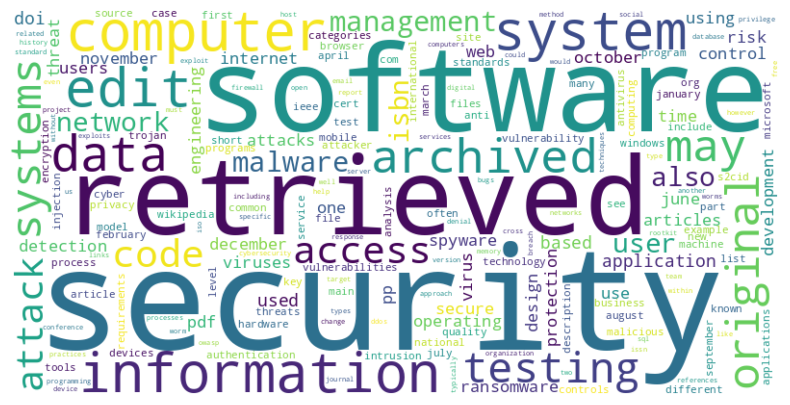

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate the word cloud using the word frequencies stored in word_freq_dict
def create_word_cloud(word_freq_dict):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Call the function to create and display the word cloud
create_word_cloud(word_freq_dict)


## Part 3

In [27]:
# Load the SQLite database into a pandas DataFrame
def load_dataframe_from_sqlite(db_name="articles_db.sqlite"):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    
    # Load the data from the "articles" table into a DataFrame
    articles_df = pd.read_sql("SELECT * FROM articles", conn, index_col="title")
    
    # Close the database connection
    conn.close()
    
    return articles_df

# Load the DataFrame and check the structure
loaded_articles_df = load_dataframe_from_sqlite()

# Check if the DataFrame has the expected structure
if loaded_articles_df is not None:
    print(loaded_articles_df.head())


                                                                          main_text  \
title                                                                                 
Abuse case - Wikipedia            \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Access-control list - Wikipedia   \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Antivirus software - Wikipedia    \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application security - Wikipedia  \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   
Application firewall - Wikipedia  \n\n\n\n\n\n\n\nFrom Wikipedia, the free encyc...   

                                                  name  \
title                                                    
Abuse case - Wikipedia                      Abuse case   
Access-control list - Wikipedia    Access-control list   
Antivirus software - Wikipedia      Antivirus software   
Application security - Wikipedia  Application security   
Application firewall - Wikipedia  Applicat

In [28]:
expected_columns = ["main_text", "name", "url", "datePublished", "dateModified", "headline"]
if all(col in loaded_articles_df.columns for col in expected_columns) and len(loaded_articles_df) == 85:
    print("The loaded DataFrame has the correct structure and 85 rows.")
else:
    print("The loaded DataFrame does not have the expected structure or row count.")


The loaded DataFrame has the correct structure and 85 rows.


#### 3 functions tokenize(), remove_stop(), prepare() from TextBook_blueprints_TFIDF.ipynb

In [29]:
def tokenize(text):
    return re.findall(r'[A-Za-z]+', text)

stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [30]:
loaded_articles_df.columns

Index(['main_text', 'name', 'url', 'datePublished', 'dateModified', 'headline',
       'headline_length'],
      dtype='object')

In [33]:
loaded_articles_df["tokens"] = loaded_articles_df["main_text"].apply(lambda x:prepare(x,pipeline))
loaded_articles_df['num_tokens'] = loaded_articles_df['tokens'].apply(len)
print(loaded_articles_df[["tokens",'num_tokens']].head())

                                                                             tokens  \
title                                                                                 
Abuse case - Wikipedia            [wikipedia, free, encyclopedia, abuse, case, s...   
Access-control list - Wikipedia   [wikipedia, free, encyclopedia, list, permissi...   
Antivirus software - Wikipedia    [wikipedia, free, encyclopedia, computer, soft...   
Application security - Wikipedia  [wikipedia, free, encyclopedia, measures, take...   
Application firewall - Wikipedia  [wikipedia, free, encyclopedia, layer, applica...   

                                  num_tokens  
title                                         
Abuse case - Wikipedia                   261  
Access-control list - Wikipedia         1043  
Antivirus software - Wikipedia          6336  
Application security - Wikipedia         991  
Application firewall - Wikipedia        1135  


In [37]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    # Process tokens and update the counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # Create a counter and run through all data
    counter = Counter()
    df[column].map(update)  # change progress_map to map

    # Transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)


freq_df = count_words(loaded_articles_df)

print(freq_df.head(10))

             freq
token            
security     3687
software     2420
retrieved    1936
information  1516
computer     1508
system       1473
edit         1405
data         1181
archived     1093
may          1015


In [39]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].map(update)

    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df') #document frequency (df), not dataframe df
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df


idf_df = compute_idf(loaded_articles_df)

print(idf_df.head(10))

             df       idf
token                    
result       37  0.931733
new          60  0.448307
w            85  0.100000
computer     83  0.123811
chris        12  2.057745
area         17  1.709438
harmful      11  2.144756
instead      31  1.108664
defines      13  1.977702
proceedings  37  0.931733


/tmp/ipykernel_2307325/3421504221.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


In [40]:
freq_df = freq_df.join(idf_df, how='left', lsuffix='_freq', rsuffix='_idf')

In [41]:
print(freq_df.columns)

Index(['freq', 'df', 'idf'], dtype='object')


In [42]:
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

In [43]:
sorted_df = freq_df.sort_values(by='tfidf', ascending=False)
print(sorted_df.head(10))

          freq    df       idf       tfidf
token                                     
testing    919  41.0  0.829079  761.923775
virus      466  27.0  1.246814  581.015506
malware    716  50.0  0.630628  451.529828
software  2420  78.0  0.185942  449.980680
security  3687  84.0  0.111834  412.333645
original  1009  63.0  0.399517  403.112179
archived  1093  65.0  0.368264  402.512537
ddos       154   7.0  2.596741  399.898131
attacks    539  45.0  0.735989  396.697945
quality    282  27.0  1.246814  351.601658


### **Differences between the Two Word Lists:**

1. **Filtered List (Frequency-based):**
   - **Words like** "security," "software," "retrieved," etc., appear at the top because they are the most frequently occurring terms in the text corpus.
   - This list gives you an idea of the most commonly used words, but it doesn't account for how "unique" or important those words are across different documents.
   - **Problem**: Common words like "security" and "software" may dominate the list, but they could be less meaningful because they appear in many documents.

2. **TF-IDF List (Weighted by Term Frequency-Inverse Document Frequency):**
   - **Words like** "ddos," "attacks," and "virus" appear higher in this list because of their higher TF-IDF scores.
   - **TF-IDF** prioritizes words that are not only frequent in a document but also relatively rare across the entire dataset. This means these words are likely more informative or specific to particular documents.
   - **Advantage**: Words with high TF-IDF are more unique and relevant to certain documents, giving them more significance for understanding the key topics or themes of those documents.

### **Analysis of the Two Lists:**

1. **Filtered List (Frequency-based)**:
   - **Top words** like "security," "software," "retrieved," "information," and "computer" are expected in a security/software-related dataset, but they are very general terms.
   - These words are important, but they may not provide much insight into the specific content of the documents.

2. **TF-IDF Sorted List**:
   - **Top words** like "ddos," "virus," "malware," "attacks," and "quality" are much more specific. They highlight important security concepts and attacks, which are more meaningful in the context of security-related documents.
   - These terms are likely to help you identify specific issues or topics (like cyber attacks, viruses, or malware) rather than just broad themes.

- **The TF-IDF sorted list is more meaningful** than the frequency-based list if we are looking to extract specific and important information about security-related topics.
- The **frequency-based list** might still be useful for understanding the overall themes or the most commonly discussed topics, but TF-IDF highlights more **unique and relevant** words for each document.

